# This code is replication of basline for VietAI data set, multilabel pathology classification
https://www.kaggle.com/hmchuong/keras-baseline-model

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
os.chdir('/content/drive/MyDrive/Viet_AI/Data')
print(os.listdir("."))

['train.csv', 'MLE_at_Epic_Software-SOLUTIONS.ipynb', 'U-net_TF2_retinal_image_segmentation_STARE.ipynb', 'U-net_binary_DB1.ipynb', 'resnet50.h5', 'my_model.h5', 'VietAI.hdf5', 'VietAI_Basline.ipynb', 'test', '.ipynb_checkpoints', 'train', 'logs', 'VietAI_multi-label.ipynb', 'mclass_data.npz', 'CNN_multi.h5', 'data.npz', 'VietAI_Tansfer_learning (1).ipynb', 'TF_30.h5', 'TF_conv_30.h5', 'VietAI_Tansfer_learning-conv.ipynb', 'LP_TF.npz', 'LP_TF_test.npz', 'TF.h5', 'VietAI_Tansfer_learning.ipynb', 'VietAI-visualize.ipynb', 'VietAI_multi_label-multi_class.ipynb', 'Viet_AI_LP_TF_noFalse_all_data.ipynb', 'TF_half_30.h5', 'LP_TF_half.npz', 'LP_TF_half_test.npz', 'VietAI-Label_propagate_TF_data_create.ipynb', 'new_train_data.npz', 'TF_1580_20.h5', 'VietAI-visualize-TF.ipynb', 'output', 'ipykernel_launcher.py_plot.png', 'TF_all_20.h5', 'Viet_AI_Results.gsheet']


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [ ]:
import sys

from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.preprocessing.image import load_img, img_to_array

from PIL import Image

# Check Eager Execution
tf.executing_eagerly() 

True

In [ ]:
# data = pd.read_csv("train.csv")
# data.head()

In [ ]:
# print(data.shape)
# l=len(data)
# print(l)
# num_class=data.shape[1]-1
# print(num_class)

In [ ]:
# def load_dataset(img_path, data):
#     images, targets = list(), list()
#     # enumerate files in the directory
#     for idx in range(l):
#     # load image
#         print(idx)
#         filename=str(data.iloc[idx,0])
#         img = load_img(img_path + filename, target_size=(256,256), color_mode='rgb')
#         # convert to numpy array
#         img = img_to_array(img, dtype='uint8')
#         #print(np.shape(img))
#         target = np.array(data.iloc[idx,1:8])
#         images.append(img)
#         targets.append(target)
#     X = np.asarray(images, dtype='uint8')
#     y = np.asarray(targets, dtype='uint8')
#     trainX, testX, trainY, testY = train_test_split(X, y, test_size=0.2, random_state=42)
#     return trainX, testX, trainY, testY

In [ ]:
# # load the images and labels
# img_path = './train/train/'
# trainX, testX, trainY, testY = load_dataset(img_path, data)

In [ ]:
#Now load the data
# Load the npy files
npzfile=np.load('new_train_data.npz')
print(npzfile.files)
trainX=npzfile['arr_0']
trainY=npzfile['arr_1']
testX=npzfile['arr_2']
testY=npzfile['arr_3']
num_class=7
np.shape(trainX), np.shape(testX)

['arr_0', 'arr_1', 'arr_2', 'arr_3']


((1930, 256, 256, 3), (687, 256, 256, 3))

In [ ]:
X=trainX[:1580]
Y=trainY[:1580]
print(np.shape(X))

(1580, 256, 256, 3)


In [ ]:
def return_per_class_counter(Y):
  C=np.zeros(7)
  for i in range(7):
    C[i]=np.sum(Y[:,i])
  return C

In [ ]:
vals=return_per_class_counter(trainY)
print(vals)

[845. 301. 396. 243. 266. 262. 300.]


# Define the model

In [ ]:
import tensorflow.keras.backend as K
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# calculate fbeta score for multi-class/label classification
def fbeta(y_true, y_pred, beta=1):
	# clip predictions
	y_pred = K.clip(y_pred, 0, 1)
	# calculate elements
	tp = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)), axis=1)
	fp = K.sum(K.round(K.clip(y_pred - y_true, 0, 1)), axis=1)
	fn = K.sum(K.round(K.clip(y_true - y_pred, 0, 1)), axis=1)
	# calculate precision
	p = tp / (tp + fp + K.epsilon())
	# calculate recall
	r = tp / (tp + fn + K.epsilon())
	# calculate fbeta, averaged across each class
	bb = beta ** 2
	fbeta_score = K.mean((1 + bb) * (p * r) / (bb * p + r + K.epsilon()))
	return fbeta_score
 

In [ ]:
# base_model = keras.applications.InceptionV3(input_shape=(256,256,3),
#                                     include_top=False,
#                                     weights='imagenet')
# base_model.trainable = True

# model_TF = keras.Sequential([
#   base_model,
#   keras.layers.GlobalAveragePooling2D(),
#   #keras.layers.Dense(512, activation='relu'), #add another layer for visualization
#   keras.layers.Dense(num_class, activation='sigmoid')
# ])

# # Print out model summary
# model_TF.summary()

In [ ]:
# for layer in base_model.layers:
#   if 'conv' not in layer.name:
#     continue
#   filters=layer.get_weights()
#   print(layer.name, np.shape(filters))

In [ ]:
# # plot diagnostic learning curves
# import matplotlib.pyplot as plt

# def summarize_diagnostics(history):
# 	# plot loss
# 	plt.subplot(211)
# 	plt.title('Cross Entropy Loss')
# 	plt.plot(history.history['loss'], color='blue', label='train')
# 	#plt.plot(history.history['val_loss'], color='orange', label='test')
# 	# plot accuracy
# 	plt.subplot(212)
# 	plt.title('Fbeta')
# 	plt.plot(history.history['fbeta'], color='blue', label='train')
# 	#plt.plot(history.history['val_fbeta'], color='orange', label='test')
# 	# save plot to file
# 	filename = sys.argv[0].split('/')[-1]
# 	plt.savefig(filename + '_plot.png')
	

In [ ]:
def preprocessing_image(image):
    """
    Preprocess image after resize and augment data with ImageDataGenerator
    
    Parameters
    ----------
    image: numpy tensor with rank 3
        image to preprocessing
    
    Returns
    -------
    numpy tensor with rank 3
    """
    rotation_range=5.,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    vertical_flip=True,
    #fill_mode='constant',
    #data_format="channels_last",
    #preprocessing_function=contrast_only,
    
    
    
    return image

In [ ]:
# # run the test harness for evaluating a model
traingen = ImageDataGenerator(rescale=1./255, preprocessing_function=preprocessing_image)
# # specify imagenet mean values for centering
# testgen = ImageDataGenerator(rescale=1./255, preprocessing_function=preprocessing_image)

# # prepare iterators
# train_it = traingen.flow(trainX, trainY, batch_size=50)
# test_it = testgen.flow(testX, testY, batch_size=50)
# # define model
# model_TF.compile(optimizer=keras.optimizers.Adam(lr=0.001), loss='binary_crossentropy', metrics=[fbeta])
# # fit model
# history = model_TF.fit(train_it, steps_per_epoch=20, epochs=25, verbose=1)
# 	#validation_data=test_it, validation_steps=20, epochs=20, verbose=1)
# # evaluate model
# #loss, fbeta = model_TF.evaluate_generator(test_it, steps=len(test_it), verbose=0)
# #print('> loss=%.3f, fbeta=%.3f' % (loss, fbeta))
# 	# learning curves



In [ ]:
# summarize_diagnostics(history)

In [ ]:
#print(history.history['val_loss'], history.history['val_fbeta'])

In [ ]:
import os
print(os.getcwd())

/content/drive/My Drive/Viet_AI/Data


In [ ]:
from tensorflow.keras.models import load_model
model_TF=load_model('TF_all_20.h5', custom_objects={'fbeta': fbeta}) #TF_30 is best
model_TF.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Functional)    (None, 6, 6, 2048)        21802784  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 7)                 14343     
Total params: 21,817,127
Trainable params: 21,782,695
Non-trainable params: 34,432
_________________________________________________________________


In [ ]:
pred=model_TF.predict(np.true_divide(testX,255),batch_size=1, verbose=1)

687/687 [==============================] - 25s 11ms/step


In [ ]:
preds=(pred>0.02).astype(int)
preds[0:5]

array([[0, 0, 1, 0, 0, 0, 0],
       [0, 0, 1, 1, 1, 0, 0],
       [1, 1, 1, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 1],
       [1, 1, 0, 1, 1, 0, 0]])

In [ ]:
def return_metrics(y_true,y_pred):
  #y_true is binary [0,1], so is y_pred
  #return precision, recall, IOU, F1, Fbeta
  tp = np.sum(y_true * y_pred)
  fp = np.sum((y_pred - y_true)>0)
  fn = np.sum((y_true - y_pred)>0)
  #print(tp)
  eps=0.000001
	# calculate precision
  p = tp / (tp + fp + eps)
	# calculate recall
  r = tp / (tp + fn + eps)
  IoU=tp/(tp+fp+fn+eps) 
  F1=(2*tp)/((2*tp)+fp+fn)
  beta=2*2
  Fbeta=np.mean((1 + beta) * (p * r) / (beta * p + r + eps))
  return p, r, IoU, F1, Fbeta


In [ ]:
result=return_metrics(testY, preds)
print(np.round(result,4))

[0.4531 0.9276 0.4376 0.6088 0.7669]


In [ ]:
def return_per_class_metrics(y_true,y_pred):
  p=np.zeros(7)
  r=np.zeros(7)
  Fbeta=np.zeros(7)
  f=np.zeros(7)
  eps=0.000001
  beta=2*2
  Fbeta=np.zeros(7)
  for i in range(7):
    y_t=y_true[:,i]
    y_p=y_pred[:,i]
    tp = np.sum(y_t * y_p)
    fp = np.sum((y_p - y_t)>0)
    fn = np.sum((y_t - y_p)>0)
    p[i] = tp / (tp + fp + eps)
    r[i] = tp / (tp + fn + eps)
    f[i]=(2*p[i]*r[i])/(p[i]+r[i])
    Fbeta[i]=np.mean((1 + beta) * (p[i] * r[i]) / (beta * p[i] + r[i] + eps))
  return p, r, f, Fbeta

In [ ]:
c_result=return_per_class_metrics(testY,preds)
c_result=np.transpose(np.round(c_result,4))
print(c_result)
print(np.mean(c_result, axis=0))

[[0.6224 0.9768 0.7603 0.8769]
 [0.4878 0.9195 0.6375 0.7812]
 [0.3117 0.9099 0.4644 0.6576]
 [0.3633 0.8981 0.5173 0.6938]
 [0.3937 0.9576 0.558  0.7444]
 [0.3081 0.7531 0.4373 0.5843]
 [0.6051 0.95   0.7393 0.8528]]
[0.44172857 0.90928571 0.58772857 0.74157143]


In [ ]:
#model_TF.save('TF_1580_20.h5')

In [ ]:
preds[0:5]

array([[0, 0, 1, 0, 0, 0, 0],
       [0, 0, 1, 1, 1, 0, 0],
       [1, 1, 1, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 1],
       [1, 1, 0, 1, 1, 0, 0]])

# Add visualization here
https://tf-explain.readthedocs.io/en/latest/methods.html#grad-cam

In [ ]:
! pip install tf-explain

     |████████████████████████████████| 51kB 5.3MB/s 


In [ ]:
from tf_explain.callbacks.grad_cam import GradCAMCallback
from tf_explain.callbacks.occlusion_sensitivity import OcclusionSensitivityCallback


In [ ]:
# Extract the test images with Glaucoma, ME and RVO
import tf_explain
tf.executing_eagerly() 

vis_test=list()
vis_lab=list()
vis_pred=list()
iterations=np.zeros(7)
#1. Galucoma
for i in range(np.shape(testY)[0]):
  if (np.sum(testY[i]*[1,0,0,0,0,0,0])>0 and iterations[0]<4):
    vis_test.append(testX[i])
    vis_lab.append(testY[i])
    vis_pred.append(preds[i])
    iterations[0]=iterations[0]+1
  elif (np.sum(testY[i]*[0,1,0,0,0,0,0])>0 and iterations[1]<4):
    vis_test.append(testX[i])
    vis_lab.append(testY[i])
    vis_pred.append(preds[i])
    iterations[1]=iterations[1]+1
  elif (np.sum(testY[i]*[0,0,1,0,0,0,0])>0 and iterations[2]<4):
    vis_test.append(testX[i])
    vis_lab.append(testY[i])
    vis_pred.append(preds[i])
    iterations[2]=iterations[2]+1
  elif (np.sum(testY[i]*[0,0,0,1,0,0,0])>0 and iterations[3]<4):
    vis_test.append(testX[i])
    vis_lab.append(testY[i])
    vis_pred.append(preds[i])
    iterations[3]=iterations[3]+1
  elif (np.sum(testY[i]*[0,0,0,0,1,0,0])>0 and iterations[4]<4):
    vis_test.append(testX[i])
    vis_lab.append(testY[i])
    vis_pred.append(preds[i])
    iterations[4]=iterations[4]+1
  elif (np.sum(testY[i]*[0,0,0,0,0,1,0])>0 and iterations[5]<4):
    vis_test.append(testX[i])
    vis_lab.append(testY[i])
    vis_pred.append(preds[i])
    iterations[5]=iterations[5]+1

vis_test=np.asarray(vis_test)
vis_lab=np.asarray(vis_lab)
vis_pred=np.asarray(vis_pred)

In [ ]:
print(np.shape(vis_test), np.shape(vis_lab))

(24, 256, 256, 3) (24, 7)


In [ ]:
#Step 3: Initialize Tensorboard to monitor changes in Model Loss 
import datetime
%load_ext tensorboard
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [ ]:
#tensorboard command
%tensorboard --logdir logs

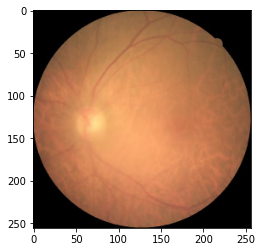

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(vis_test[4])

In [ ]:
%tensorboard --logdir logs

In [ ]:
o_callbacks = [OcclusionSensitivityCallback(validation_data=(vis_test, vis_lab),class_index=2,patch_size=4),
]

 #

In [ ]:
## Attache tensorboard for this visualization

model_TF.compile(optimizer=keras.optimizers.Adam(lr=0.001), loss='binary_crossentropy', metrics=[fbeta])
model_TF.fit(vis_test, vis_lab, epochs=10, verbose=1, callbacks=[tensorboard_callback, o_callbacks])

Epoch 1/10
1/1 [==============================] - 9s 9s/step - loss: 0.7450 - fbeta: 0.4306
Epoch 2/10
1/1 [==============================] - 1s 827ms/step - loss: 0.1270 - fbeta: 0.8653
Epoch 3/10
1/1 [==============================] - 0s 90ms/step - loss: 0.0381 - fbeta: 1.0000
Epoch 4/10
1/1 [==============================] - 0s 90ms/step - loss: 0.0256 - fbeta: 1.0000
Epoch 5/10
1/1 [==============================] - 0s 89ms/step - loss: 0.0175 - fbeta: 1.0000
Epoch 6/10
1/1 [==============================] - 0s 89ms/step - loss: 0.0116 - fbeta: 1.0000
Epoch 7/10
1/1 [==============================] - 0s 88ms/step - loss: 0.0082 - fbeta: 1.0000
Epoch 8/10
1/1 [==============================] - 0s 89ms/step - loss: 0.0062 - fbeta: 1.0000


In [ ]:
import matplotlib.pyplot as plt
it=0
for idx in range(12):
    img=vis_test[idx]
    #print(np.shape(img))
    label=str(vis_lab[idx])
    #label=trainY[idx]
    predict=str(vis_pred[idx])
    if(np.sum(vis_lab[idx]*vis_pred[idx])>0):
      it=it+1
      explainer = tf_explain.core.GradCAM()
      grid = explainer.explain(([img], None), model_TF.layers[0], class_index=1)
      f, ax = plt.subplots(1,2,figsize = (8,8))
      ax[0].set_title("True label: " + str(label))
      ax[0].imshow(img)
      ax[1].set_title("Predicted label: " + str(predict))
      ax[1].imshow(grid)
      if(it>10):
        break